In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [18]:
N = 101
L = 8 * np.pi
dx = L/(N - 1)
x = np.arange(-L/2, L/2, dx)
f = np.cos(x) * np.exp(-x**2/25)
df = - (np.sin(x))* np.exp(-x**2/25) + np.cos(x) * -(2.0/25)*x*np.exp(-x**2/25)
Nx = max(f.shape)


In [19]:
# approximate derivative using finite difference
dfFD = np.zeros(len(f))
for k in range(1, len(f)-1):
    dfFD[k] = (f[k+1] - f[k]) / dx
dfFD[len(f) - 1] = (f[- 1] - f[-2]) / dx


In [20]:
# spectral derivative
kap = 2*np.pi/L * np.arange(-Nx/2,Nx/2,1)
kap = np.fft.fftshift(kap)
dfSPEC = 1j*kap*np.fft.fft(f)
dfSPEC = np.fft.ifft(dfSPEC)

c:\msys64\mingw64\lib\python3.11\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\msys64\mingw64\lib\python3.11\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


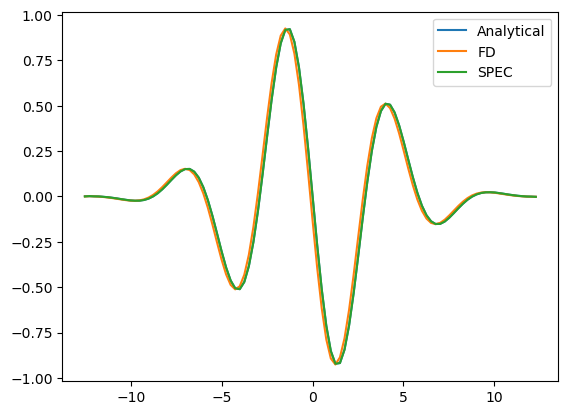

In [21]:
plt.plot(x, df, label="Analytical")
plt.plot(x, dfFD, label="FD")
plt.plot(x, dfSPEC, label="SPEC")
plt.legend()